#Web Scraping - Amazon One plus 6T reviews

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
def scrapping(page,cust,title,rating,reviewwords):

  #parsing the web page as html page
  soup=bs(page.content,'html.parser')

  #finding the name of the reviewers
  names=soup.find_all('span',class_='a-profile-name') #span - tag
  for i in range(2,len(names)):
    cust.append(names[i].get_text())
  #print(len(cust))

  #finding the name of the review title
  rev_tit=soup.find_all('a',class_='review-title')
  for i in range(len(rev_tit)):
    title.append((rev_tit[i].get_text()).strip("\n"))
  #print(len(title))

  #finding the name of the review rating
  temp=soup.find_all('i',class_='review-rating')
  for i in range(2,len(temp)):
    a=(temp[i].get_text()).strip("\n")
    b=(a.replace("out of 5 stars","")).split(" ")
    rating.append(b[0])
  #print(len(rating))

  #finding the review
  review=soup.find_all("span",class_='review-text-content')
  for i in range(len(review)):
    reviewwords.append((review[i].get_text()).strip('\n'))
  #print(len(reviewwords))

  return cust,title,rating,reviewwords




In [ ]:
cust=[];title=[];rating=[];reviewwords=[]
for num in range(1,21):
  url="https://www.amazon.in/OnePlus-Mirror-Black-128GB-Storage/product-reviews/B07DJHV6VZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(num)
  page= requests.get(url)
  while('200' not in str(page)):
    page= requests.get(url)
  cust,title,rating,reviewwords=scrapping(page,cust,title,rating,reviewwords)


In [ ]:
import pandas as pd
df=pd.DataFrame()
df["CustomerName"]=cust
df["Reviewtitle"]=title
df["Review"]=reviewwords
df["Rating"]=rating


In [ ]:
df

,CustomerName,Reviewtitle,Review,Rating
0,Tanmay Shukla,Flagship Killer,I got this phone on Friday evening.Pros:Grea...,5.0
1,Surbhi Garg,Camera quality is very poor.,Camera quality is not upto the mark. I visit...,2.0
2,klknow,Dead on arrival,I charged the phone completely out of the bo...,1.0
3,abdulkadir garari,Not worth to buy 6T,One plus 6 was costing 28k during the big bi...,1.0
4,Anshu K.,Beautiful phone,Good build.amazing battery life. ( Minimum 3...,4.0
...,...,...,...,...
195,Saurabh,Awesome Device with Superb User Experience,Best thing about this device has to be the O...,5.0
196,Yadnyesh Prabhu,IPhone killer,You can never go wrong with OnePlus phones. ...,5.0
197,Stanley gladson,Awesome in everything,This mobile is the best I have ever seen bef...,5.0
198,Sutirtho Mukhopadhyay,The perfect Phone,So many reviews are already available.. not ...,5.0


In [ ]:
df.to_csv("Oneplus_reviews.csv")

#Sentiment Analysis using the web scrapped data

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df=pd.read_csv("Oneplus_reviews.csv")
df=df.drop("Unnamed: 0",axis=1)
df

,CustomerName,Reviewtitle,Review,Rating,Sentiment
0,Tanmay Shukla,Flagship Killer,I got this phone on Friday evening.Pros:Grea...,5,1
1,Surbhi Garg,Camera quality is very poor.,Camera quality is not upto the mark. I visit...,2,0
2,klknow,Dead on arrival,I charged the phone completely out of the bo...,1,0
3,abdulkadir garari,Not worth to buy 6T,One plus 6 was costing 28k during the big bi...,1,0
4,Anshu K.,Beautiful phone,Good build.amazing battery life. ( Minimum 3...,4,1
...,...,...,...,...,...
195,Saurabh,Awesome Device with Superb User Experience,Best thing about this device has to be the O...,5,1
196,Yadnyesh Prabhu,IPhone killer,You can never go wrong with OnePlus phones. ...,5,1
197,Stanley gladson,Awesome in everything,This mobile is the best I have ever seen bef...,5,1
198,Sutirtho Mukhopadhyay,The perfect Phone,So many reviews are already available.. not ...,5,1


In [ ]:
df.isnull().sum()

CustomerName    0
Reviewtitle     0
Review          0
Rating          0
Sentiment       0
dtype: int64

In [ ]:
df["Sentiment"].value_counts()

0    109
1     91
Name: Sentiment, dtype: int64

In [ ]:
df["Sentiment"]=df["Sentiment"].replace(0,-1)

In [ ]:
df

,CustomerName,Reviewtitle,Review,Rating,Sentiment
0,Tanmay Shukla,Flagship Killer,I got this phone on Friday evening.Pros:Grea...,5,1
1,Surbhi Garg,Camera quality is very poor.,Camera quality is not upto the mark. I visit...,2,-1
2,klknow,Dead on arrival,I charged the phone completely out of the bo...,1,-1
3,abdulkadir garari,Not worth to buy 6T,One plus 6 was costing 28k during the big bi...,1,-1
4,Anshu K.,Beautiful phone,Good build.amazing battery life. ( Minimum 3...,4,1
...,...,...,...,...,...
195,Saurabh,Awesome Device with Superb User Experience,Best thing about this device has to be the O...,5,1
196,Yadnyesh Prabhu,IPhone killer,You can never go wrong with OnePlus phones. ...,5,1
197,Stanley gladson,Awesome in everything,This mobile is the best I have ever seen bef...,5,1
198,Sutirtho Mukhopadhyay,The perfect Phone,So many reviews are already available.. not ...,5,1


In [ ]:
import matplotlib.pyplot as plt
def wordcloud(df):
    text=''
    for txt in df.Review:
        txt=str(txt)
        words = txt.split()
        text += " ".join(words)+" "

    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

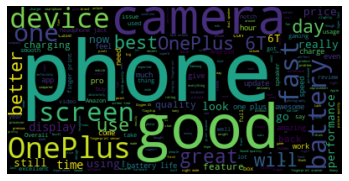

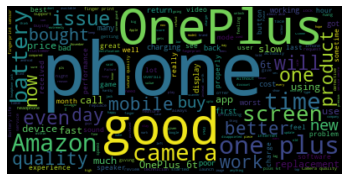

In [ ]:
negrev=df[df["Sentiment"]==-1]
posrev=df[df["Sentiment"]==1]
posrev=pd.DataFrame(posrev)
negrev=pd.DataFrame(negrev)
wordcloud(posrev)
wordcloud(negrev)

In [ ]:
stopwords = STOPWORDS
stopwords.add('&')
stopwords.add('x')
cleaned_words=[]
full_text=df["Review"]
for w in full_text:
  text=''
  for word in w.split():
    if word not in stopwords:
      text+=" "+word+" "
  cleaned_words.append(text)

In [ ]:
len(cleaned_words)

200

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(cleaned_words)
df_vectorized = vectorizer.transform(cleaned_words)

In [ ]:
print(df_vectorized)
y=df["Sentiment"]

  (0, 3062)	0.061829481544032144
  (0, 3011)	0.1085176016287528
  (0, 2985)	0.09238748357481033
  (0, 2912)	0.05826941537251662
  (0, 2909)	0.07442092892250723
  (0, 2876)	0.07127626220496754
  (0, 2511)	0.12622947267331602
  (0, 2498)	0.09238748357481033
  (0, 2386)	0.1406373277448106
  (0, 2234)	0.11710644097439475
  (0, 2232)	0.06529789722358598
  (0, 2165)	0.07557503649251025
  (0, 2086)	0.11063354697265287
  (0, 2034)	0.03265391846933712
  (0, 2028)	0.11063354697265287
  (0, 2021)	0.12622947267331602
  (0, 1870)	0.0767915578741472
  (0, 1852)	0.06384576987066343
  (0, 1748)	0.11710644097439475
  (0, 1630)	0.09804209959417778
  (0, 1611)	0.12622947267331602
  (0, 1587)	0.12622947267331602
  (0, 1521)	0.06057915074256049
  (0, 1376)	0.08244617389351465
  (0, 1338)	0.10151051527373162
  :	:
  (199, 835)	0.11831774115753789
  (199, 833)	0.12753513769135444
  (199, 832)	0.09334310117229815
  (199, 818)	0.11177789423993127
  (199, 741)	0.0909479514235151
  (199, 657)	0.08680325425469156

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(df_vectorized,y,test_size = 0.2)

In [ ]:
x_train.shape,y_train.shape

((160, 3074), (160,))

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
print(classification_report(lr.predict(x_val) , y_val))
print(accuracy_score(lr.predict(x_val) , y_val ))

              precision    recall  f1-score   support

          -1       0.96      0.87      0.91        30
           1       0.69      0.90      0.78        10

    accuracy                           0.88        40
   macro avg       0.83      0.88      0.85        40
weighted avg       0.90      0.88      0.88        40

0.875


In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

          -1       0.93      0.81      0.86        31
           1       0.54      0.78      0.64         9

    accuracy                           0.80        40
   macro avg       0.73      0.79      0.75        40
weighted avg       0.84      0.80      0.81        40

0.8


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re



max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Review'].values)
X = tokenizer.texts_to_sequences(df['Review'].values)
X = pad_sequences(X)

In [ ]:
X

array([[   0,    0,    0, ...,   51,  560,  159],
       [   0,    0,    0, ...,   40,   60,  561],
       [   0,    0,    0, ...,    1,  130, 1561],
       ...,
       [   0,    0,    0, ...,   57,    1,   74],
       [   0,    0,    0, ...,   83,   18,  322],
       [   0,    0,    0, ...,  343,   16,   29]], dtype=int32)

In [ ]:
Y = pd.get_dummies(df['Sentiment']).values
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(134, 628) (134, 2)
(66, 628) (66, 2)


In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=32, verbose = 2)
print(model.summary())

Epoch 1/10
5/5 - 18s - loss: 0.6893 - accuracy: 0.5672
Epoch 2/10
5/5 - 15s - loss: 0.6851 - accuracy: 0.5821
Epoch 3/10
5/5 - 15s - loss: 0.6329 - accuracy: 0.6045
Epoch 4/10
5/5 - 15s - loss: 0.6109 - accuracy: 0.7985
Epoch 5/10
5/5 - 15s - loss: 0.5270 - accuracy: 0.8806
Epoch 6/10
5/5 - 15s - loss: 0.4230 - accuracy: 0.8507
Epoch 7/10
5/5 - 15s - loss: 0.3783 - accuracy: 0.9104
Epoch 8/10
5/5 - 15s - loss: 0.2392 - accuracy: 0.9552
Epoch 9/10
5/5 - 15s - loss: 0.2178 - accuracy: 0.9403
Epoch 10/10
5/5 - 15s - loss: 0.1475 - accuracy: 0.9701
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 628, 128)          256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 628, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (N